# Group Project For ASTR 19

In [18]:
from astropy.io import ascii
import matplotlib.pyplot as plt

In [24]:
data = ascii.read('Data/UID_0043587_RVC_008.tbl.txt')
data

HJD,Radial_Velocity,Radial_Velocity_Uncertainty
days,m / s,m / s
float64,float64,float64
2449676.0632,131.910003662,4.8400002
2449767.77441,22.6000003815,2.5699999
2449768.83203,-5.48999977112,2.6800001
2449793.79785,107.309997559,1.52
2450056.98828,116.669998169,1.6199999
2450087.88184,77.2600021362,2.1600001
2450088.91894,32.5999984741,1.64
2450089.00586,33.7299995422,1.5599999


In [25]:
print(data.columns)
print(data.colnames)
print(data.meta)
print(len(data))

<TableColumns names=('HJD','Radial_Velocity','Radial_Velocity_Uncertainty')>
['HJD', 'Radial_Velocity', 'Radial_Velocity_Uncertainty']
{'comments': [], 'keywords': {'STAR_ID': {'value': 'HD 75732'}, 'DATA_CATEGORY': {'value': 'Planet Radial Velocity Curve'}, 'NUMBER_OF_POINTS': {'value': '274'}, 'TIME_REFERENCE_FRAME': {'value': 'HJD'}, 'MINIMUM_DATE': {'value': '2449676.0632'}, 'DATE_UNITS': {'value': 'days'}, 'MAXIMUM_DATE': {'value': '2455603.80404'}, 'MINIMUM_VALUE': {'value': '-130.570007324'}, 'VALUE_UNITS': {'value': 'm/s'}, 'MAXIMUM_VALUE': {'value': '141.460006714'}, 'REFERENCE': {'value': 'Howard & Fulton, 2016'}, 'BIBCODE': {'value': '2016arXiv160603134H'}, 'TELESCOPE': {'value': '3.0m Shane'}, 'INSTRUMENT': {'value': 'l: Hamilton Spectrograph post-dewar 16 (after November 1994)'}, 'WAVELENGTH_CALIBRATION_TECHNIQUE': {'value': 'Iodine'}, 'OBSERVATORY_SITE': {'value': 'Lick Observatory, California'}, 'COLUMN_RADIAL_VELOCITY': {'value': 'Relative radial velocity'}, 'COLUMN_RAD

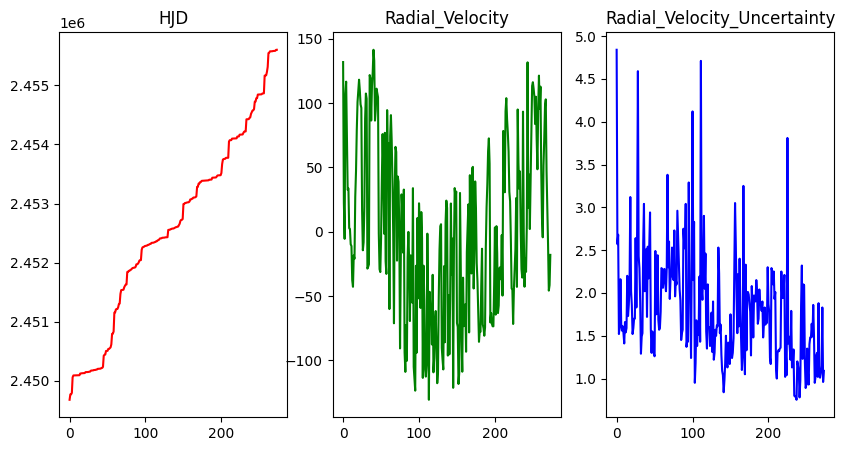

In [41]:
fig, ax = plt.subplots(1,3, figsize=(10, 5))

# define x based on number of rows
x = range(len(data))

color = ["r", "g", "b"]

for i in range(len(data.columns)):
    ax[i].plot(x, data.columns[i], c=color[i])
    ax[i].set_title(f'{data.colnames[i]}')

fig.savefig("data.pdf")
plt.show()